In [1]:
import pandas as pd
data = pd.read_csv('financial_data.csv', index_col='Date')
data.index = pd.to_datetime(data.index) # Convert the index

In [2]:
prices = data['Close']

In [3]:
prices[0:5]

Date
1972-06-01    2.153220
1972-06-02    2.149165
1972-06-05    2.149165
1972-06-06    2.124835
1972-06-07    2.112669
Name: Close, dtype: float64

In [4]:
prices[-5:]

Date
2016-12-23    12.46
2016-12-27    12.39
2016-12-28    12.25
2016-12-29    12.23
2016-12-30    12.13
Name: Close, dtype: float64

In [5]:
prices.shift()[0:5]

Date
1972-06-01         NaN
1972-06-02    2.153220
1972-06-05    2.149165
1972-06-06    2.149165
1972-06-07    2.124835
Name: Close, dtype: float64

In [6]:
prices.shift()[-5:]

Date
2016-12-23    12.40
2016-12-27    12.46
2016-12-28    12.39
2016-12-29    12.25
2016-12-30    12.23
Name: Close, dtype: float64

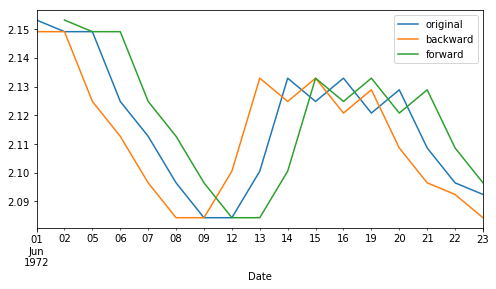

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

prices[:'1972-06-23'].plot(figsize=(8, 3), label='original')
prices.shift(-1)[:'1972-06-23'].plot(figsize=(8, 4), label='backward')
prices.shift(1)[:'1972-06-23'].plot(figsize=(8, 4), label='forward')
plt.legend()
plt.show()

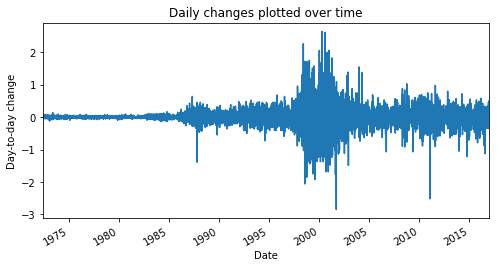

In [9]:
# Compute first difference
diff = prices - prices.shift(1)

# Plot the results
diff.plot(figsize=(8, 4))
plt.title('Daily changes plotted over time')
plt.ylabel('Day-to-day change')
plt.show()


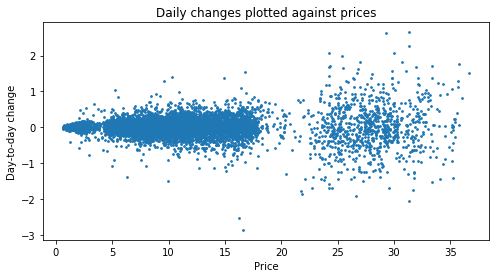

In [10]:
plt.figure(figsize=(8, 4))
plt.scatter(prices, diff, s=3)
plt.title('Daily changes plotted against prices')
plt.xlabel('Price')
plt.ylabel('Day-to-day change')
plt.show()

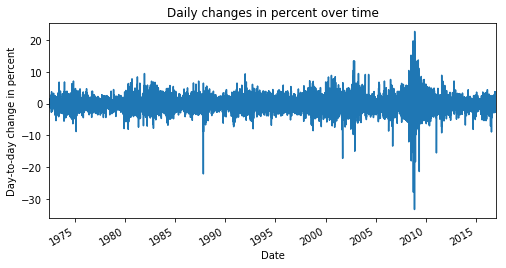

In [11]:
daily_percentage_change=(100*diff/prices)
daily_percentage_change.plot(figsize=(8, 4))
plt.title('Daily changes in percent over time')
plt.ylabel('Day-to-day change in percent')
plt.show()


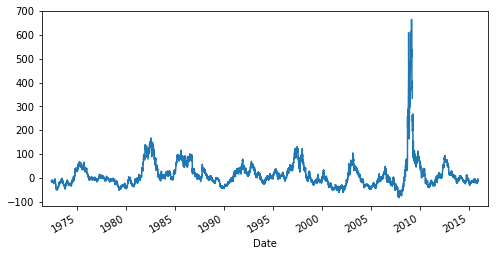

In [12]:
# Net profit over a year (in working days)
net_profit = prices.shift(-260, freq='B') - prices

# Return on Investment
roi = (net_profit/prices) * 100 # in percent

# Plot result
roi.plot(figsize=(8, 4))
plt.show()
